In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [115]:
df = pd.read_csv("shoes_prices.csv")
df_origin = df.copy()

In [16]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118


In [17]:
print("\nLast 5 rows of the dataset:")
df.tail()


Last 5 rows of the dataset:


,brand,color,size,price,offer_price
5674,Toms,Red & White,4,6747,5098
5675,Crocs,Black,7,2942,2868
5676,Toms,Blue,9,4847,3673
5677,Liberty,Black,6,2146,1722
5678,Crocs,Brown,2,3442,3368


In [7]:
print("\nBasic information about the dataset:")
df.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


In [8]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

In [9]:
print("\nShape of the dataset (rows, columns):")
df.shape


Shape of the dataset (rows, columns):


(5679, 5)

In [10]:
print("\nData types of each column:")
df.dtypes


Data types of each column:


brand          object
color          object
size           object
price           int64
offer_price     int64
dtype: object

In [11]:
print("\nnombre of Unique values per column:")
df.nunique()


Unique values per column:


brand           30
color          115
size            38
price          178
offer_price    386
dtype: int64

In [7]:
print("\nnombre of Unique values in color column:")
df["color"].unique()

array(['Black', 'Gold', 'Red', 'Blue', 'Brown', 'White', 'Black & Red',
       'Bordo', 'Camel', 'Light Tan', 'Grey', 'Tan', 'Silver',
       'Navy & Red', 'Green', 'Navy', 'Pink', 'Beige', 'Yellow', 'Orange',
       'Grey & Blue', 'Purple', 'Blush', 'Multi', 'Gray', 'Off White',
       'Grey & Red', 'Black & White', 'Midnight Blue ', 'Olive',
       'Black/Orange', 'Khaki', 'Black & Maroon', 'Tan Light Brown',
       'Black & Neon Green', 'Dark Brown', 'Rose Gold', 'Pewter',
       'Multi Color', 'Charcoal', 'Makhani', 'Cognac', 'Black/Green',
       'Cherry', 'Navy & Orange', 'Light Grey', 'White and Silver',
       'Taupe', 'Ash', 'Reddish Brown', 'Cool Blue', 'Light Brown',
       'Navy Blue', 'Black ', 'Natural White', 'Nude', 'Black/Blue',
       'Champagne', 'Camel Brown', 'Black & Blue', 'Peach', 'Olive Green',
       'Red & Black', 'Arabesco White', 'Coral', 'Khakhi', 'Tobacco',
       'Gold Silver', 'Blue & White', 'Cream', 'Maroon', 'White ',
       'Aqua Green', 'Black and 

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["color"] = label_encoder.fit_transform(df["color"])
df["color"]

0        4
1       45
2       89
3       89
4       22
        ..
5674    91
5675     4
5676    22
5677     4
5678    27
Name: color, Length: 5679, dtype: int64

In [20]:
print("\nnombre of Unique values in brand column:")
df["brand"].unique()


nombre of Unique values in brand column:


array(['Tresmode', 'Lavie', 'FILA', 'Crocs', 'Franco Leone', 'LaBriza',
       'Hush Puppies', 'Woodland', 'Adidas', 'Buckaroo', 'Liberty',
       'Bata', 'Hidesign', 'Havaianas', 'Asics', 'Reebok', 'Vanilla Moon',
       'Nike', 'Converse', 'Tory Burch', 'Imperial India Company',
       'Umbro', 'Footin', 'PUMA', 'Toms', 'Numero Uno', 'Lee Cooper',
       'Toni Rossi', 'Sting', 'Power'], dtype=object)

In [21]:
df["brand"] = label_encoder.fit_transform(df["brand"])
df["brand"]

0       26
1       14
2        6
3        5
4        5
        ..
5674    23
5675     5
5676    23
5677    16
5678     5
Name: brand, Length: 5679, dtype: int64

In [28]:
print("\nnombre of Unique values in size column:")
df["size"].unique()


nombre of Unique values in size column:


array(['6.5', '4', '6', '5', '8', '10', '11', '3', '7', '9', '2.5', '12',
       '12.5', '2', '3.5', '13', '7.5', '10.5', '4.5', '8.5', '41', '40',
       'UK-09', '9.5', 'UK-07', '14', '5.5', 'UK-10', 'UK-06', 'UK-08',
       '15', '37', '16', 'UK-11', '39', '1', '38', '11.5'], dtype=object)

In [34]:
df["size"]=df["size"].str.replace("UK-","").astype(float)
df["size"].unique()

array([ 6.5,  4. ,  6. ,  5. ,  8. , 10. , 11. ,  3. ,  7. ,  9. ,  2.5,
       12. , 12.5,  2. ,  3.5, 13. ,  7.5, 10.5,  4.5,  8.5, 41. , 40. ,
        9.5, 14. ,  5.5, 15. , 37. , 16. , 39. ,  1. , 38. , 11.5])


Correlation matrix:


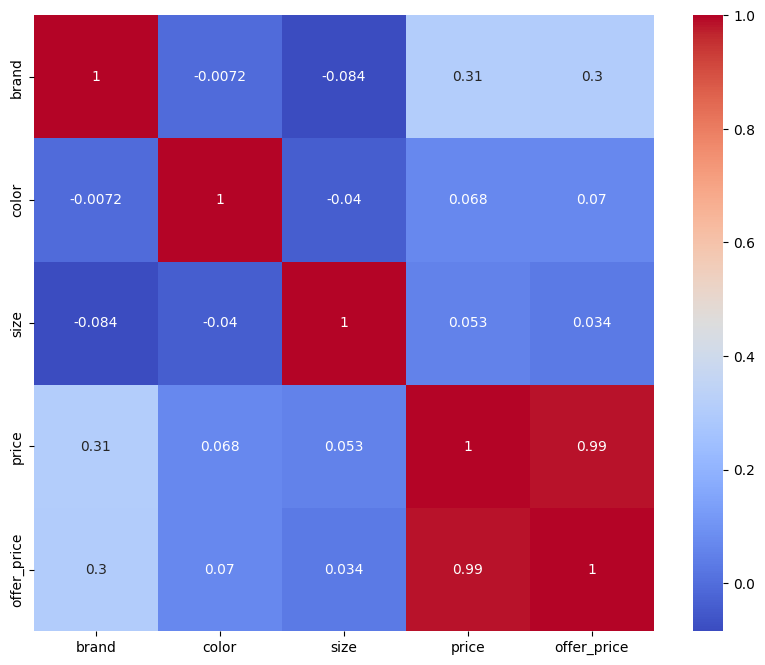

In [35]:
print("\nCorrelation matrix:")
correlation_matrix=df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot=True, cmap = 'coolwarm')
plt.show()

# Price Prediction

In [38]:
scaler = StandardScaler()
scaled_df= pd.DataFrame(scaler.fit_transform(df), 
                         columns=df.columns)
scaled_df

,brand,color,size,price,offer_price
0,1.504211,-1.079302,-0.269499,-0.055783,0.030509
1,0.177492,0.070240,-1.093757,-0.467615,-0.595604
2,-0.706988,1.303894,-0.434350,-0.486326,-0.443119
3,-0.817548,1.303894,-0.764054,0.186526,0.390718
4,-0.817548,-0.574625,-1.093757,-0.374808,-0.396911
...,...,...,...,...,...
5674,1.172531,1.359969,-1.093757,0.337151,0.228991
5675,-0.817548,-1.079302,-0.104647,-0.374808,-0.239386
5676,1.172531,-0.574625,0.554760,-0.018361,-0.070308
5677,0.398612,-1.079302,-0.434350,-0.523748,-0.480085


In [39]:
X=scaled_df.drop(["price","offer_price"],axis=1)
y=scaled_df[["price"]]

In [78]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score_train = model.score(X_train,y_train)
    score_test = model.score(X_test,y_test)
    return score_train,score_test,mse

In [79]:
models={LinearRegression():"Linear Regression score_train,score_test, MSE:",AdaBoostRegressor(random_state=42, n_estimators=100):"AdaBoost score_train,score_test, MSE:", Lasso(alpha=0.3):"Lasso score_train,score_test, MSE: " }

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [81]:
for model, result in models.items():
    mse = evaluate_model(model, X_train, X_test, y_train, y_test)
    print("\n",result,mse)


 Linear Regression score_train,score_test, MSE: (0.10696142579786838, 0.10204686294488252, np.float64(0.7978459114818931))

 AdaBoost score_train,score_test, MSE: (0.8857447438524694, 0.8731509642005544, np.float64(0.11270742359664575))

 Lasso score_train,score_test, MSE:  (0.0089040266300624, 0.006902055871265578, np.float64(0.8823836141635413))


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    print(f"Redge with alpha={alpha} model score_train,score_test, MSE: {evaluate_model(ridge, X_train, X_test, y_train, y_test)}")


Redge with alpha=0.1 model score_train,score_test, MSE: (0.10696142574051426, 0.10204731401596734, np.float64(0.7978455106979258))
Redge with alpha=1.0 model score_train,score_test, MSE: (0.10696142006485976, 0.1020513667409565, np.float64(0.797841909786108))
Redge with alpha=10.0 model score_train,score_test, MSE: (0.10696085489980822, 0.10209121239739172, np.float64(0.7978065062747607))
Redge with alpha=100.0 model score_train,score_test, MSE: (0.10690665754097572, 0.10242437726544018, np.float64(0.7975104838913503))
Redge with alpha=1000.0 model score_train,score_test, MSE: (0.10319045315215747, 0.10134321644976818, np.float64(0.7984711127937307))
Redge with alpha=10000.0 model score_train,score_test, MSE: (0.055005276064250985, 0.055503890134776634, np.float64(0.8392000969425498))


<Axes: title={'center': 'Brands'}, xlabel='brand', ylabel='nombre of clients'>

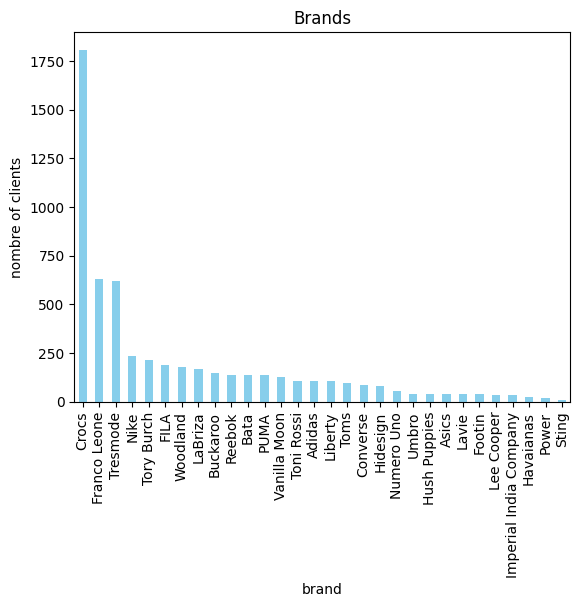

In [116]:
counts = df_origin['brand'].value_counts()
plt.title("Brands")
plt.xlabel("different brands")
plt.ylabel("nombre of clients")
counts.plot(kind='bar', color='skyblue')

<Axes: title={'center': 'top colors'}, xlabel='color', ylabel='nombre of clients'>

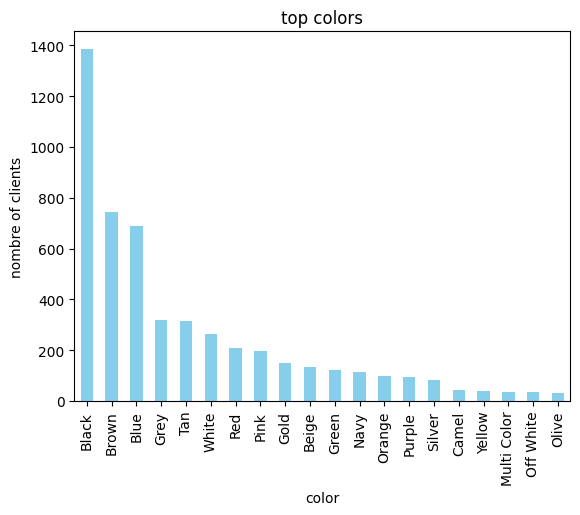

In [121]:
counts = df_origin['color'].value_counts()[0:20]
plt.title("top colors")
plt.xlabel("top 20 colors")
plt.ylabel("nombre of clients")
counts.plot(kind='bar', color='skyblue')

<Axes: title={'center': 'prices mean for each brand'}, xlabel='brand', ylabel='prices_mean'>

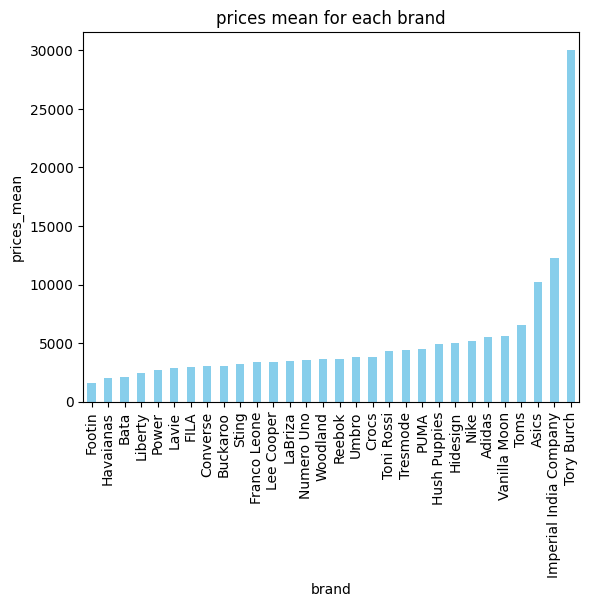

In [127]:
counts = df_origin.groupby("brand")["price"].mean().sort_values()
plt.title("prices mean for each brand")
plt.xlabel("Brands")
plt.ylabel("prices_mean")
counts.plot(kind='bar', color='skyblue')
